<a href="https://colab.research.google.com/github/fernandoantonio36/Fast-Cesar-School/blob/main/Fernando_Oliveira_Hands_On_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 1

Nessa atividade iremos dar os primeiros passos 
para a tarefa de clustering (aprendizado não-supervisionado)
é esperado que ao término dessa prática se tenha as seguintes habilidades:

* Análise exploratória a partir de uma gráfico de dispersão;
* Execução do algoritmo k-means através da lib sklearn;
* Análise dos clusters gerados

## passo 1: import das libs necessárias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics
# [ALTERE AQUI] importe o k-means
from sklearn.cluster import KMeans

## passo 2: carregar o dataset

Obs: iremos considerar X sendo nosso dataset e y_true o que seriam as classes dos dados

In [ ]:
X, y_true = make_blobs(
    n_samples=100, n_features=2, centers=4, cluster_std=0.4, random_state=0
)

# os dados foram carregados em um formato matricial numpy, 
# porém para facilitar as análises precisaremos converter para um
# tipo pandas DataFrame
X = pd.DataFrame(X)

## passo 3: análise exploratória do dataset

dimensões do dataset (exemplos, features):  (100, 2)

as estatísticas básicas dos dados: 
                0           1
count  100.000000  100.000000
mean     0.046855    4.032004
std      1.534099    2.519609
min     -2.123407    0.207151
25%     -1.413324    2.277369
50%     -0.213944    3.669748
75%      1.576931    5.549598
max      2.808528    8.607273

dispersão dos dados:


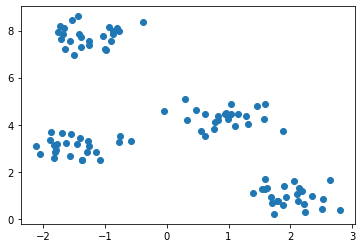

In [ ]:
print("dimensões do dataset (exemplos, features): ", X.shape)
print("\nas estatísticas básicas dos dados: ")
print(X.describe())

print("\ndispersão dos dados:")
# [ALTERE AQUI] plote o gráfico de dispersão colocando no eixo X a feature 0 e no eixo Y a feature 1
eixo_x = X.iloc[:,0]
eixo_y = X.iloc[:,1]
plt.scatter(eixo_x, eixo_y)
plt.show()

## passo 4: execução do k-means

In [ ]:
X.head(5)



# [ALTERE AQUI] Execute o k-means passando o número de clusters igual a 4 e salve na variável model
model = KMeans(n_clusters=4).fit(X)

y_predict = model.labels_
print(y_predict)

model.cluster_centers_

[3 1 3 3 3 3 0 1 3 1 1 1 1 1 1 2 2 0 0 2 3 1 0 2 3 0 0 3 2 2 2 1 2 2 0 3 1
 2 1 0 3 0 1 0 0 1 2 0 3 3 3 2 0 0 0 1 1 2 2 1 1 2 2 3 2 1 0 0 2 3 1 2 3 1
 3 3 0 0 2 2 2 1 0 3 2 0 2 2 3 3 3 0 3 0 0 1 1 0 1 3]


array([[-1.48886624,  3.07731162],
       [-1.26414502,  7.77811813],
       [ 2.00454873,  0.9520213 ],
       [ 0.93588159,  4.3205638 ]])

## passo 5: avaliação do k-means

Silhueta:  0.7697826124517921
NMI:  1.0


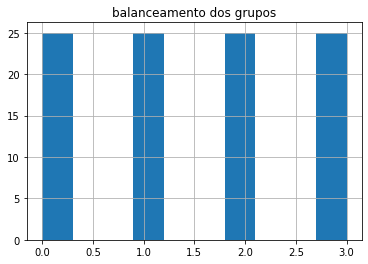

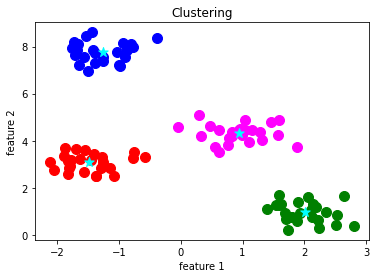

In [ ]:
sil = metrics.silhouette_score(X, y_predict, metric='euclidean')
nmi = metrics.adjusted_mutual_info_score(y_true, y_predict)

print("Silhueta: ", sil)
print("NMI: ", nmi)

# check como ficou o balanceamento
_ = pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()

plt.scatter(X.iloc[y_predict==0, 0], X.iloc[y_predict==0, 1], s=100, c='red')
plt.scatter(X.iloc[y_predict==1, 0], X.iloc[y_predict==1, 1], s=100, c='blue')
plt.scatter(X.iloc[y_predict==2, 0], X.iloc[y_predict==2, 1], s=100, c='green')
plt.scatter(X.iloc[y_predict==3, 0], X.iloc[y_predict==3, 1], s=100, c='magenta')

eixo_x = model.cluster_centers_[:, 0]
eixo_y = model.cluster_centers_[:, 1]

plt.scatter(eixo_x, eixo_y, s=100, c='cyan', marker='*')

# plot de como ficou a clusterização
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 1 e atribua a cor vermelha
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 2 e atribua a cor azul
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 3 e atribua a cor verde
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 4 e atribua a cor magenta

# [ALTERE AQUI] plote o gráfico de dispersão para os centróides e atribua a cor amarela
plt.title('Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()